# Alzheimer's Prediction
------------------------------------------------------------------------------------------------------------------------
#### ***Final project for partial fulfilment of course Data Science at SCDE of Jawaharlal Nehru Technological University Hyderabad.***
________________________________________________________________________________________________________________________


Project by: ***yourname***

E-Mail:  ***email@domain.com***

Project Report: (report link)


In [1]:
# pip install sklearn

In [2]:
#importing libraries
import numpy as np
import sklearn as sk
import pandas as pd
import os

In [3]:
#Read data
data = pd.read_csv('Alzheimer’s Patient data.csv')

#Check NA values, 1 NA for imputed_genotype
data.isnull().sum()

directory.id               0
Subject                    0
RID                        0
Image.Data.ID              0
Modality                   0
Visit                      0
Acq.Date                   0
DX.bl                      0
EXAMDATE                   0
AGE                        0
PTGENDER                   0
PTEDUCAT                   0
PTETHCAT                   0
PTRACCAT                   0
APOE4                      0
MMSE                       0
imputed_genotype           1
APOE Genotype              0
Dx Codes for Submission    0
dtype: int64

### Remove NaN

In [4]:
data = data.dropna()
data.isnull().sum().sum()

0

In [5]:
#Peek at data
data.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,9/1/05,AD,9/12/05,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,11/8/05,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,9/2/05,CN,9/7/05,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,11/15/05,LMCI,11/29/05,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3",MCI
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,11/7/05,AD,11/10/05,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4",AD


## Remove ID's and other features

In [6]:
X = data
Y = data['DX.bl']
del data

#Remove unnecessary columns (features), remove first 9 columns and 'Dx codes for submission'
remove_columns = list(X.columns)[0:9]
remove_columns.append('Dx Codes for Submission')
print('Removing columns:', remove_columns)

X = X.drop(remove_columns, axis=1)

features = list(X.columns)
X.head()

Removing columns: ['directory.id', 'Subject', 'RID', 'Image.Data.ID', 'Modality', 'Visit', 'Acq.Date', 'DX.bl', 'EXAMDATE', 'Dx Codes for Submission']


,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype
0,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4"
1,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3"
2,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3"
3,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3"
4,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4"


## Exploratory Data Analysis (EDA)

In [7]:
numerical_vars = ['AGE', 'MMSE', 'PTEDUCAT']
cat_vars = list(set(features) - set(numerical_vars))

print('Categorical variable distributions:\n')

for var in cat_vars:
    print('\nDistribution of', var)
    
    print(X[var].value_counts())

Categorical variable distributions:


Distribution of PTRACCAT
White    583
Black     31
Asian     13
Name: PTRACCAT, dtype: int64

Distribution of imputed_genotype
True     466
False    161
Name: imputed_genotype, dtype: int64

Distribution of PTGENDER
Male      363
Female    264
Name: PTGENDER, dtype: int64

Distribution of APOE Genotype
3,3    275
3,4    221
4,4     71
2,3     45
2,4     13
2,2      2
Name: APOE Genotype, dtype: int64

Distribution of APOE4
0    322
1    234
2     71
Name: APOE4, dtype: int64

Distribution of PTETHCAT
Not Hisp/Latino    616
Hisp/Latino          8
Unknown              3
Name: PTETHCAT, dtype: int64


### Categorical Var Distribution Notes
- Ethnicity and Race are separate vars
- Distribution of Hispanic, Black, White, Asian not quite same as overall American ethnic/racial distribution
- APOE Genotype with 3 in the first spot seems to be overwhelming majority 3,3 and 3,4
- More males in study than females
### Numerical Variable Distributions
- All 3 distributions seem a bit right-skewed
- Age: mean = 75, min=55, max=89 - seems to be no obvious bad data
- MMSE: mean = 26.9, min=20, max=30 - seems to be no obvious bad data, NOTE: MMSE 
- PTEDUCAT: mean = 15.6, min=6, max=20 - seems to be no obvious bad data. 13-14 yrs is probably high school/GED and 17- 18 years is likely Bachelor's degree

Numerical Var Distributions:



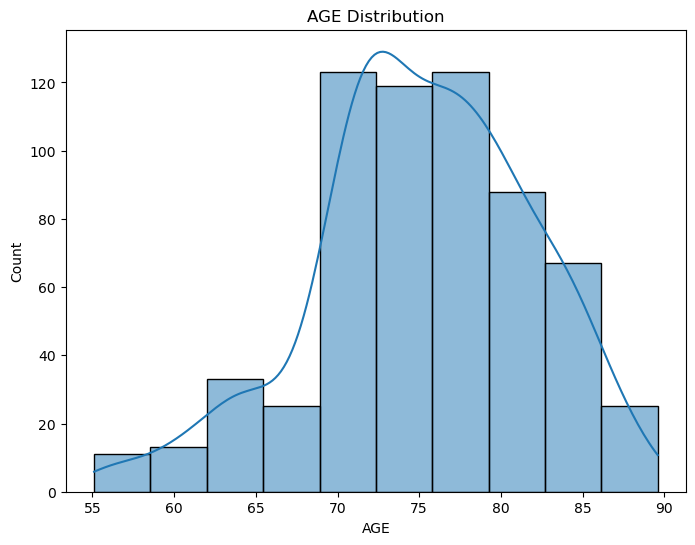

count    627.000000
mean      75.161882
std        6.689979
min       55.100000
25%       71.200000
50%       75.400000
75%       80.000000
max       89.600000
Name: AGE, dtype: float64


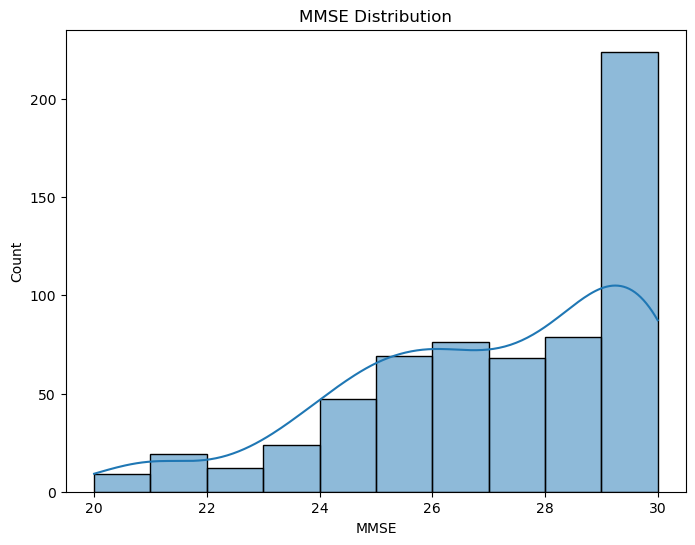

count    627.000000
mean      26.921850
std        2.563934
min       20.000000
25%       25.000000
50%       27.000000
75%       29.000000
max       30.000000
Name: MMSE, dtype: float64


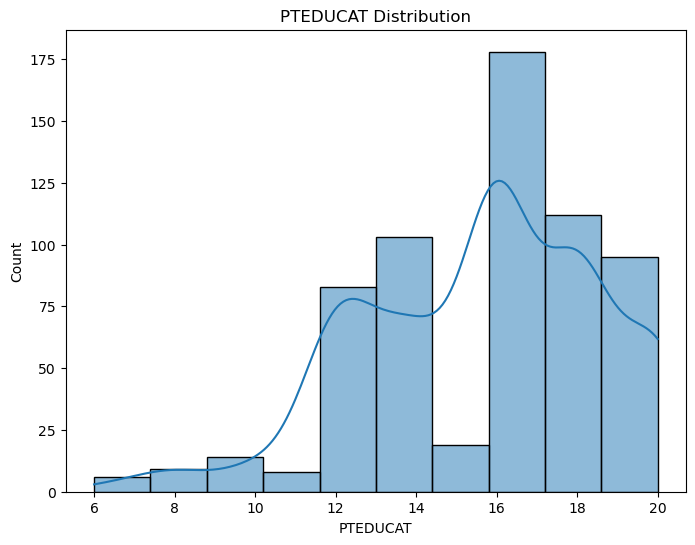

count    627.000000
mean      15.612440
std        2.978845
min        6.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       20.000000
Name: PTEDUCAT, dtype: float64


In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

print('Numerical Var Distributions:\n')

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X, x=var, bins=10, kde=True)
    plt.title(var + ' Distribution')
    plt.show()
    
    # descriptive stats
    print(X[var].describe())


### Analyze target (y) distribution
- High number (304) of limited impairment (LMCI). Maybe old age? Or the patients being evaluated are not random elderly patients but patients already known to have cognitive issues.

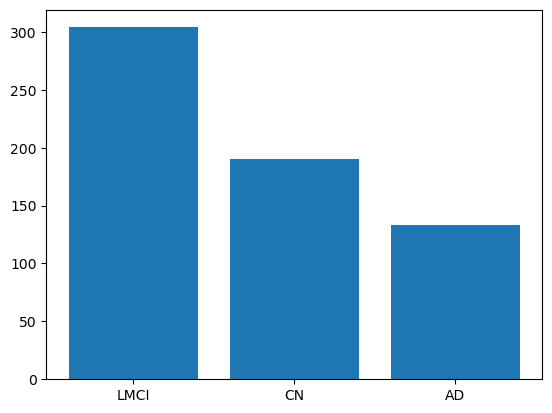

In [9]:
import matplotlib.pyplot as plt

counts = Y.value_counts()
plt.bar(counts.index, counts.values)
plt.show()


## Pre-processing

Convert Categorical Variables to 1-Hot

- Next time use sklearn.preprocessing.OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

# instantiate the OneHotEncoder with sparse=False to return a dense array
onehot_encoder = OneHotEncoder(sparse=False)

# apply OneHotEncoder to each categorical variable
for var in cat_vars:
    # fit and transform the OneHotEncoder on the variable
    onehot_encoded = onehot_encoder.fit_transform(X[[var]])
    
    # create column names for the new one-hot encoded columns
    col_names = [var + '_' + str(i) for i in range(onehot_encoded.shape[1])]
    
    # add the new one-hot encoded columns to the original dataframe
    X[col_names] = onehot_encoded
    
    # drop the original categorical column
    X = X.drop(var, axis=1)

X.head(4)

,AGE,PTEDUCAT,MMSE,PTRACCAT_0,PTRACCAT_1,PTRACCAT_2,imputed_genotype_0,imputed_genotype_1,PTGENDER_0,PTGENDER_1,...,APOE Genotype_2,APOE Genotype_3,APOE Genotype_4,APOE Genotype_5,APOE4_0,APOE4_1,APOE4_2,PTETHCAT_0,PTETHCAT_1,PTETHCAT_2
0,81.3,18,20,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,67.5,10,27,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,73.7,16,29,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,80.4,13,25,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
def normalize(X):
    """
    Normalize numerical variables for faster and better convergence
    
    Args:
        X (pd.DataFrame): data
        
    Returns:
        X (pd.DataFrame): same data but with normalized numerical features
    """
    numerical_vars = X.select_dtypes(include='number').columns.tolist()

    #Normalize numerical variables to speed up convergence
    for var in numerical_vars:
        mean = X[var].mean()
        sd = X[var].std()
        print('\nNormalizing', var, 'with mean=', format(mean, '.2f'), 'and sd=', format(sd, '.2f'))

        X[var] = (X[var] - mean) / sd

    return X


In [12]:
import numpy as np

# Combine X and Y into one numpy array
data = np.column_stack((X, Y))

# Shuffle the data
np.random.shuffle(data)

# Split the data into training and testing sets
split_idx = int(0.7 * len(data))
train_data = data[:split_idx]
test_data = data[split_idx:]

# Separate X and Y from the training and testing sets
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

print('X_train:', X_train.shape, '\ty_train:', y_train.shape)
print('X_test:', X_test.shape, '\ty_test:', y_test.shape)
num_test = X_test.shape[0]


X_train: (438, 22) 	y_train: (438,)
X_test: (189, 22) 	y_test: (189,)


## Predicting model using different Algorithms 

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

# create the classifier
log_clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000000, multi_class='multinomial')

# fit the classifier on the training data
log_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = log_clf.predict(X_test)

# evaluate the classifier's accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.7407407407407407


### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

# create the classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# fit the classifier on the training data
dt_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = dt_clf.predict(X_test)

# evaluate the classifier's accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.5978835978835979


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# create the classifier
rf_clf = RandomForestClassifier(random_state=42)

# fit the classifier on the training data
rf_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_clf.predict(X_test)

# evaluate the classifier's accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.6931216931216931


### Support Vector Machines (SVMs)

In [16]:
from sklearn.svm import SVC

# create the classifier
svm_clf = SVC(kernel='linear', C=1)

# fit the classifier on the training data
svm_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = svm_clf.predict(X_test)

# evaluate the classifier's accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.6984126984126984


### K-Nearest Neighbors (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# create the classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

# fit the classifier on the training data
knn_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = knn_clf.predict(X_test)

# evaluate the classifier's accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.6243386243386243


C:\Users\Koushik Reddy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

# create the classifier
nb_clf = GaussianNB()

# fit the classifier on the training data
nb_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = nb_clf.predict(X_test)

# evaluate the classifier's accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.3333333333333333


### Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# create the classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# fit the classifier on the training data
gb_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = gb_clf.predict(X_test)

# evaluate the classifier's accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.7142857142857143


## Accuracy of all the models we used

In [20]:
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB(), GradientBoostingClassifier()]


for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {clf.__class__.__name__}: {acc}")


Accuracy of LogisticRegression: 0.5873015873015873
Accuracy of DecisionTreeClassifier: 0.5978835978835979


C:\Users\Koushik Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of RandomForestClassifier: 0.6666666666666666
Accuracy of SVC: 0.4656084656084656
Accuracy of KNeighborsClassifier: 0.6455026455026455
Accuracy of GaussianNB: 0.3333333333333333


C:\Users\Koushik Reddy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of GradientBoostingClassifier: 0.7142857142857143
